<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Set-up-the-Environment-and-Upload-data" data-toc-modified-id="Set-up-the-Environment-and-Upload-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Set up the Environment and Upload data</a></span></li><li><span><a href="#Initial-Exploration-and-Pre-processing" data-toc-modified-id="Initial-Exploration-and-Pre-processing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Initial Exploration and Pre-processing</a></span><ul class="toc-item"><li><span><a href="#DisGeNET-:-Gene-Disease-Association-(GDA)" data-toc-modified-id="DisGeNET-:-Gene-Disease-Association-(GDA)-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>DisGeNET : Gene Disease Association (GDA)</a></span></li><li><span><a href="#Data-pre-processing" data-toc-modified-id="Data-pre-processing-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data pre-processing</a></span></li><li><span><a href="#Exploratory-Analysis" data-toc-modified-id="Exploratory-Analysis-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Exploratory Analysis</a></span></li></ul></li><li><span><a href="#Bibliografia" data-toc-modified-id="Bibliografia-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Bibliografia</a></span></li></ul></div>

In [120]:
#packages
from tdc.multi_pred import GDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import HTML
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.feature_selection import VarianceThreshold
from scipy.spatial.distance import pdist, squareform

## Set up the Environment and Upload data

<div style="text-align: justify;">
To ensure that all the project's dependencies are installed correctly, we recommend using a Conda environment.

You can easily create the environment with the project's dependencies from the env.yml file included in this repository.
To download the dataset, we will use the GDA class from the tdcommons.multi_pred package.

In [6]:
# To use the DisGeNET dataset with TDC platform, we use the following code:
data = GDA(name='DisGeNET')
print("Data uploading completed :)")

Found local copy...
Loading...
Done!


Data uploading completed :)


## 1. Initial Exploration and Pre-processing

<div style="text-align: justify;">
This section contains a comprehensive overview of the assigned data, starting with a detailed description and characterization based on existing documentation and literature. It includes a concise summary of the data's characteristics derived from an initial exploratory analysis, highlighting key statistics and observations. The section also describes the steps taken for data preparation and pre-processing, providing justification for each choice to ensure the data is clean, transformed, and organized for further analysis. Additionally, initial exploratory graphs are presented to visually illustrate the main characteristics of the data, helping to understand patterns, trends, and potential issues within the dataset.
 </div>

### DisGeNET : Gene Disease Association (GDA) 

In [7]:
HTML('<div style="display: flex; justify-content: center;"><img src="https://www.ensembl.info/wp-content/uploads/2021/04/disgenet-logo-horizontal.png" width="400"/></div>')

The study of **gene-disease associations is a crucial step in understanding the etiology of diseases**. Identifying the link between genes and diseases makes it possible to better understand the cause of the disease and therefore to develop strategies to combat it. This process is fundamental to the advancement of medicine and the development of new therapies. [1]

    

**Therapeutics Data Commons (TDC) is a database created to promote the discovery of therapies for diseases**, especially those that are difficult to treat. It was developed by the National Institutes of Health with the aim of gathering genomic and clinical data from various sources to support biomedical research and the development of new treatments. [2]


**GDA quantify the relation among a pair of gene-disease** and is one of the core concepts of DisGeNet platform that are integrated on TDC. DisGeNET is a discovery platform containing one of the largest publicly available collections of genes and variants associated to human diseases. **DisGeNET integrates data from expert curated repositories, Genome-Wide Association Study catalogues, animal models and the scientific literature**. DisGeNET data are homogeneously annotated with controlled vocabularies and community-driven ontologies. TDC uses the curated subset from UNIPROT, CGI, ClinGen, Genomics England, CTD (human subset), PsyGeNET, and Orphanet. TDC maps disease ID to disease definition through MedGen and maps GeneID to uniprot amino acid sequence. [3]


This dataset contains **52,476 gene-disease pairs:** 7,399 unique genes and 7,095 unique diseases.                                   
As we can see by de code bellow we have an object with 52,476 rows and 5 columns: *'Gene_ID'*, *'Gene'*, *'Disease_ID'*, *'Disease'*, *'Y'*. 

- **Gene_ID** column contains all unique identifiers for genes.
- **Gene** column contains the sequences of amino acides corresponding to each gene_ID through Uniprot platform.
- **Disease_ID** column contains all unique identifiers for diseases.
- **Disease** column contains the disease definition corresponding to each disease_ID through MedGen-NCBI platform.
- **Y** column is the target feature and represents the probability of association for a pair gene-disease. This column have values between 0 and 1.

As our target feature is a numeric one, our work will be a regression problem when the main task is: *Given the disease description and the amino acid sequence of the gene, predict their association*.

In [8]:
#Load data and inspecting GDA dataset
full_data = data.get_data()
full_data.info()
full_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52476 entries, 0 to 52475
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gene_ID     52476 non-null  int64  
 1   Gene        52476 non-null  object 
 2   Disease_ID  52476 non-null  object 
 3   Disease     52476 non-null  object 
 4   Y           52476 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.0+ MB


,Gene_ID,Gene,Disease_ID,Disease,Y
0,1,MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...,C0019209,Hepatomegaly: Abnormal enlargement of the liver.,0.30
1,1,MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...,C0036341,Schizophrenia: Schizophrenia is highly heritab...,0.30
2,2,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...,C0002395,Alzheimer's Disease: Alzheimer disease is the ...,0.50
3,2,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...,C0007102,Malignant tumor of colon: A primary or metasta...,0.31
4,2,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...,C0009375,Colonic Neoplasms: A benign or malignant neopl...,0.30


In [9]:
data.print_stats()

--- Dataset Statistics ---
7399 unique genes.
7095 unique diseases.
52476 gene-disease pairs.
--------------------------


PASSAR A ANALISE EXPLORATORIA PARA AQUI ; FAZ MAIS SENTIDO, PRIMEIRO TERMOS A "INSPEÇAO" DO DATASET E SO DEPOIS FAZERMOS AS TAREFAS DE PREPROCESSAMENTO CONFORME O QUE VIMOS

### Data Pre-Processing

Pre-processing is a crucial step to ensure the dataset is ready for analysis and modeling. 
The original “full_data” dataset, loaded from the “tdcommons.multi_pred” package, does not contain any features relevant to the learning tasks that follow. As we've seen before, the available columns - Gene_ID, Gene, Disease_ID, Disease- are made up of identifiers and textual descriptions. The columns containing IDs are just numbers that carry no meaningful information and therefore cannot be used directly to learn patterns. The columns containing textual descriptions, although they contain useful information, are unstructured data that don´t capture semantic and contextual relationships. Gene-disease association analysis requires the transformation of textual and sequential data into numerical representations that can be used in supervised learning tasks. 

In a first attempt to obtain relevant features, we analyzed the DISGENET database directly. The database allows  the creation of an account for academic purposes, where access is given to an API that facilitates the consultation of data related to genes and their associations with diseases. This API provides an efficient means of exploring and integrating biological and clinical data, giving access to parameters such as “geneProteinClassNames”, “diseaseName”, “Disease Specificity Index”, among others. However, the academic account comes with limitations, such as restrictions on the number of requests that can be made per minute/day and the volume of data accessed. Since there is also no possibility of downloading this information directly from the site, this solution was excluded.

In a second approach, we tried to create additional binary columns to represent the presence of specific organs in the description of diseases. To do this, we created a list of terms related to organs and health conditions, such as “liver”, “cancer”, “skin”, “brain”, among others, and applied a function that checked for the presence of these terms in disease descriptions. For each term found, the function assigned the value 1, otherwise 0. This process created new columns in the dataset that indicated, in binary form, the presence or absence of each of these organs or conditions in the description. However, this approach did not work properly, since there was no exact correspondence between the terms in the list and the way the diseases were described, i.e. there was a lot of loss of information, and in addition, we would have to deal with sparsity.

The third approach tested was the creation of embeddings for the "Gene" and "Disease" columns. Embeddings are numerical representations of data, such as words, phrases or even entire documents, which capture the semantics and relationships between elements in a dense and continuous way. Ulike one-hot encoding, which represents each nvalue as a sparse vector with a large number of zeros, embeddings transform information into low-dimensional vectors, where elements with similar meanings or contexts are represented by nearby vectors in the vector space. This approach reduces dimensionality while allowing the model to capture more complex relationships between data, such as synonyms or contextual associations. In the context of machine learning, embeddings are extremely useful because they allow the model to understand the semantics of the data more efficiently, facilitating generalization and the ability to learn patterns that are not explicitly present in the training data.




In this context, the "Gene" and "Disease" columns of the dataset were transformed using appropriate methods for each type of data: k-mers combined with Word2Vec for amino acid sequences, and BioBERT for textual descriptions of diseases. 

Key steps include:  

- Transformation of the "Disease" Column (Textual Descriptions of Diseases): generate embeddings through BioBERT model
- Transformation of the "Gene" Column (Amino Acid Sequences): generate embedding through k-mers + Word2Vec
- Feature integration: Combining generated features into a unified dataset.  
- Data cleaning and normalization: Handling missing values and scaling numerical features.  
- Dataset splitting: dividing the data into training, validation, and test sets.

#### Transformation of the "Disease" Column (Textual Descriptions of Diseases)
The "Disease" column contains textual descriptions extracted from MedGen, a database that organizes information related to human medical genetics, including attributes of conditions with a genetic contribution.
**BERT (Bidirectional Encoder Representations from Transformers)** is a pre-trained language model based on the Transformer architecture, which processes text bidirectionally, meaning it considers the full context of a word, both to the left and to the right of it. This allows BERT to better understand the meaning of words in different contexts. The model was trained on large volumes of text, such as Wikipedia and books, and is used for various Natural Language Processing tasks, such as machine translation, text classification, and named entity recognition. **BioBERT**, on the other hand, is an adaptation of BERT specifically fine-tuned for the biomedical field. It was trained on biomedical databases, such as PubMed and PMC, allowing it to understand and process the specialized terminology and concepts found in scientific and medical texts. BioBERT can generate high-quality embeddings for biomedical words and phrases, making it a valuable tool for tasks like information extraction, text classification, and question answering in the healthcare domain. [4]

In [71]:
#Packages needed to create embeddings with BioBert

!pip install torch
!pip install transformers
!pip install gensim

import torch
from transformers import BertTokenizer, BertModel

  Using cached torch-2.5.1-cp39-cp39-win_amd64.whl.metadata (28 kB)
  Using cached filelock-3.16.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
  Using cached mpmath-1.3.0-py3-none-any.whl.metadata (8.6 kB)
Using cached torch-2.5.1-cp39-cp39-win_amd64.whl (203.0 MB)
Using cached sympy-1.13.1-py3-none-any.whl (6.2 MB)
Using cached filelock-3.16.1-py3-none-any.whl (16 kB)
Using cached mpmath-1.3.0-py3-none-any.whl (536 kB)
  Using cached regex-2024.11.6-cp39-cp39-win_amd64.whl.metadata (41 kB)
   ---------------------------------------- 0.0/10.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/10.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/10.1 MB ? eta -:--:--
   - --------------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pytdc 0.3.8 requires rdkit-pypi, which is not installed.
matplotlib 3.9.2 requires numpy>=1.23, but you have numpy 1.22.4 which is incompatible.


This code demonstrates how we use BioBERT to generate embeddings for disease descriptions from a dataset. It first loads the pre-trained BioBERT model and its associated tokenizer using the transformers library. The get_biobert_embedding function tokenizes the input text (in this case, disease descriptions), processes it through BioBERT to generate embeddings, and then averages these embeddings across all tokens to produce a single vector representation for each disease. These embeddings are then added as a new column, Disease_Embedding, to the dataset. Finally, the updated dataset, now containing the generated embeddings, is saved to a CSV file for further analysis.

In [ ]:
# Load BioBERT and tokenizer
#model_name = "dmis-lab/biobert-v1.1"  # pre-trained model BioBERT for biomedical tasks
#tokenizer = BertTokenizer.from_pretrained(model_name)
#model = BertModel.from_pretrained(model_name)

# Obtain embeddings by BioBERT
#def get_biobert_embedding(text, tokenizer, model):
#    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True, max_length=512)
#    with torch.no_grad():
#        outputs = model(**inputs)
#    embeddings = outputs.last_hidden_state
#   embedding = embeddings.mean(dim=1).squeeze().numpy()
#    return embedding

# Generate embeddings for all disease descriptions
#full_data['Disease_Embedding'] = full_data['Disease'].apply(lambda x: get_biobert_embedding(x, tokenizer, model))

# Save dataframe with disease embeddings
#full_data.to_csv('dataset_with_embeddings.csv', index=False)

In [73]:
#Reading csv with the disease embeddings
df_with_disease_emb = pd.read_csv('dataset_with_embeddings.csv')
print(df_with_disease_emb.head())

   Gene_ID                                               Gene Disease_ID  \
0        1  MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...   C0019209   
1        1  MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...   C0036341   
2        2  MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...   C0002395   
3        2  MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...   C0007102   
4        2  MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...   C0009375   

                                             Disease     Y  \
0   Hepatomegaly: Abnormal enlargement of the liver.  0.30   
1  Schizophrenia: Schizophrenia is highly heritab...  0.30   
2  Alzheimer's Disease: Alzheimer disease is the ...  0.50   
3  Malignant tumor of colon: A primary or metasta...  0.31   
4  Colonic Neoplasms: A benign or malignant neopl...  0.30   

                                   Disease_Embedding  
0  [-1.98067158e-01  8.78047347e-02  1.04391329e-...  
1  [ 9.51891020e-02  3.84718403e-02 -1.41937628e-...  
2  [ 

In [74]:
# Number of generated embeddings
num_embeddings = df_with_disease_emb['Disease_Embedding'].notnull().sum()
print(f"Number of generated embeddings: {num_embeddings}")

Number of generated embeddings: 52476


The code generates 52476 embeddings, each corresponding to a disease description in the dataset. Each embedding represents the semantic meaning of the disease description associated with a specific gene in the dataset.

#### Transformation of the "Gene" Column (Amino Acid Sequences)

The **amino acid sequences in the "Gene" column** represent the primary structure of proteins, containing fundamental information about the biological functions of genes. However, these sequences are expressed as text strings and cannot be directly processed by machine learning models. To address this, the **k-mers and Word2Vec approach** was chosen, which is widely used in bioinformatics due to its ability to capture local patterns and semantic relationships among subsequences.

The approach of generating embeddings for gene sequences using k-mers and Word2Vec transforms complex biological information into numerical representations that capture relevant patterns in gene sequences. First, the gene sequences are divided into k-mers, fixed-length subsequences, which help to identify important local patterns. Next, the Word2Vec model is used to map these k-mers to numerical vectors, taking into account the context in which they appear in the sequences. This approach allows k-mers with similar contexts to have close vector representations, reflecting significant genetic patterns. The average of the vectors of the k-mers of a sequence is then calculated, creating a fixed vector that synthesizes the information of the entire sequence. This average vector reflects the most relevant patterns and characteristics of the gene, creating features that capture the essence of the genetic sequences.

In [ ]:
#from itertools import islice

# Function to generate k-mers
#def generate_kmers(sequence, k=3):
#    """Split an amino acid sequence into k-mers."""
#    return [sequence[i:i+k] for i in range(len(sequence) - k + 1)]

# Generate k-mers for each sequence
#k = 3  # Ajuste o tamanho do k-mer conforme necessário
#full_data['k_mers'] = full_data['Gene'].apply(lambda seq: generate_kmers(seq, k))

#Convert k-mers into list (expected format for Word2Vec)
#corpus = full_data['k_mers'].tolist()

In [ ]:
#from gensim.models import Word2Vec

# Train the Word2Vec model
#model = Word2Vec(
#    sentences=corpus,       # List of lists of k-mers
#    vector_size=100,        # Dimension of the embeddings
#    window=5,               # Context window size
#    min_count=1,            # Minimum frequency to consider a k-mer
#    workers=4,              # Number of threads for training
#    sg=1                    # Skip-gram (1) or CBOW (0)
#)

# Save the trained model
#model.save("word2vec_model.model")

In [ ]:
# Function to calculate the average vector of k-mers in a sequence

# def sequence_vector(kmers, model):
#     vectors = [model.wv[kmer] for kmer in kmers if kmer in model.wv]
#     if vectors:
#         return np.mean(vectors, axis=0)
#     else:
#         return np.zeros(model.vector_size)

# Add average vectors to the DataFrame
# full_data['vector'] = full_data['k_mers'].apply(lambda kmers: sequence_vector(kmers, model))

# Save dataframe with sequence embeddings
#full_data.to_csv('full_data_sequence_emebdings.csv', index=False)

After generating the embeddings for the gene sequences, the updated dataframe, which now contains the sequence embeddings, is saved into a CSV file named 'full_data_sequence_embeddings.csv'. This step allows for easy storage and retrieval of the generated embeddings, enabling their subsequent use in further analysis and machine learning tasks. By using index=False, the row indices are excluded from the file, ensuring that only the relevant data, including the sequence embeddings, is saved. This approach ensures the embeddings are preserved in a structured format, ready for future processing or model training.

In [75]:
#Reading csv with the AA sequence embeddings
df_with_seq_emb = pd.read_csv('full_data_sequence_emebdings.csv')
print(df_with_seq_emb.head())

   Gene_ID                                               Gene Disease_ID  \
0        1  MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...   C0019209   
1        1  MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...   C0036341   
2        2  MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...   C0002395   
3        2  MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...   C0007102   
4        2  MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...   C0009375   

                                             Disease     Y  \
0   Hepatomegaly: Abnormal enlargement of the liver.  0.30   
1  Schizophrenia: Schizophrenia is highly heritab...  0.30   
2  Alzheimer's Disease: Alzheimer disease is the ...  0.50   
3  Malignant tumor of colon: A primary or metasta...  0.31   
4  Colonic Neoplasms: A benign or malignant neopl...  0.30   

                                              k_mers  \
0  ['MSM', 'SML', 'MLV', 'LVV', 'VVF', 'VFL', 'FL...   
1  ['MSM', 'SML', 'MLV', 'LVV', 'VVF', 'VFL', 'FL...   
2 

#### Extracting relevant features of the "Gene_ID" Column
To enhance the dataset with additional information, the code queries gene descriptions associated with each Gene_ID by leveraging the NCBI Entrez database. For each unique gene ID, a request is made to the Entrez eSummary API, which retrieves XML data containing the gene description. The code iterates over a list of gene IDs, constructs the appropriate URL for each, and processes the response to extract the gene description. The descriptions, along with their corresponding Gene_ID, are then written to a CSV file. This process allows for the enrichment of the dataset with detailed gene information, which can be useful for understanding the genetic context in the analysis.

In [ ]:
#gene_ncbi_ids = full_data['Gene_ID'].tolist()

# Remove duplicates using set
#unique_gene_ids = list(set(gene_ncbi_ids))

In [ ]:
#import requests
#import csv
#from xml.etree import ElementTree

# List of gene IDs 
#gene_ids = unique_gene_ids

# Base URL for querying gene information
#url_base = 'https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esummary.fcgi?db=gene&id={}&retmode=xml'

# Open the CSV file for writing
#with open('genes_descriptions.csv', mode='w', newline='', encoding='utf-8') as file:
#    writer = csv.writer(file)
#    
    # Write the CSV header
#    writer.writerow(['GeneID', 'Description'])
    
    # Iterate over each gene_id
#    for gene_id in gene_ids:
        # Construct the URL for each gene ID
#        url = url_base.format(gene_id)
        
        # Make the request
#        response = requests.get(url)
        
        # If the request was successful
#       if response.status_code == 200:
#            tree = ElementTree.fromstring(response.content)
            
            # Try to access the Description tag directly
#            description = "Description not found"
#           for elem in tree.iter():
#                if elem.tag == "Description" and elem.text:
#                    description = elem.text.strip()
#                    break
            
            # Write the data to the CSV
#            writer.writerow([gene_id, description])
#        else:
            # In case data cannot be accessed
#            writer.writerow([gene_id, "Error accessing data"])

In [76]:
#Reading csv with the genes descriptions
df_with_genes_descriptions = pd.read_csv('genes_descriptions.csv')
print(df_with_genes_descriptions.head())

   GeneID                       Description
0       1            alpha-1-B glycoprotein
1       2             alpha-2-macroglobulin
2       9             N-acetyltransferase 1
3      12          serpin family A member 3
4      15  aralkylamine N-acetyltransferase


In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create TF-IDF vector
vectorizer = TfidfVectorizer(max_features=500)  
X_tfidf = vectorizer.fit_transform(df_with_genes_descriptions['Description'])

# Inspecting matrix
print(f"TF-IDF shape: {X_tfidf.shape}")

TF-IDF shape: (7399, 500)


In [78]:
# Features names
feature_names = vectorizer.get_feature_names_out()

# Matrix to DF
tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=feature_names)

print(tfidf_df.head())


    10   11   12   13   14   15   16   17   18   19  ...  ubiquitin  udp  unc  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...        0.0  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...        0.0  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...        0.0  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...        0.0  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...        0.0  0.0  0.0   

   vesicle  voltage   wd  with  wnt  zinc  zipper  
0      0.0      0.0  0.0   0.0  0.0   0.0     0.0  
1      0.0      0.0  0.0   0.0  0.0   0.0     0.0  
2      0.0      0.0  0.0   0.0  0.0   0.0     0.0  
3      0.0      0.0  0.0   0.0  0.0   0.0     0.0  
4      0.0      0.0  0.0   0.0  0.0   0.0     0.0  

[5 rows x 500 columns]


In [79]:
# Palavras mais relevantes para o primeiro GeneID
gene_0 = tfidf_df.iloc[0]
print(gene_0[gene_0 > 0].sort_values(ascending=False).head(10))

glycoprotein    0.852498
alpha           0.522731
Name: 0, dtype: float64


In [80]:
# Converter a matriz TF-IDF para um formato denso para análise
dense_matrix = X_tfidf.toarray()

# Calcular as estatísticas descritivas
min_value = np.min(dense_matrix)
max_value = np.max(dense_matrix)
mean_value = np.mean(dense_matrix)
std_value = np.std(dense_matrix)

print(f"Minimum TF-IDF value: {min_value}")
print(f"Maximum TF-IDF value: {max_value}")
print(f"Mean TF-IDF value: {mean_value}")
print(f"Standard deviation of TF-IDF values: {std_value}")

Minimum TF-IDF value: 0.0
Maximum TF-IDF value: 1.0
Mean TF-IDF value: 0.003086847777664768
Standard deviation of TF-IDF values: 0.04263185452146437


0.0 e 1.0 são os valores extremos de relevância para as palavras.
A média baixa (0.003) e o desvio padrão pequeno (0.042) indicam que, embora existam palavras mais importantes, a maioria das palavras nas descrições dos genes não é altamente distintiva ou relevante.

VER ALTERNATIVAS PARA PODERMOS USAR ESTA NOVA COLUNA OU DESCARTAR ? TALVEZ FOSSE INTERESSANTE PARA A EXPLORATÓRIA ?

In [67]:
df_with_disease_emb.columns

NameError: name 'df_with_disease_emb' is not defined

In [68]:
df_with_seq_emb.columns

NameError: name 'df_with_seq_emb' is not defined

#### Feature Integration
The merge was performed to consolidate data from two separate datasets into a unified structure. This merging process ensures that all relevant information, including the embeddings generated for diseases and genes, is combined for comprehensive analysis and model training. The merge is performed using the common columns: **Gene_ID, Disease_ID, Gene, Disease, and Y**. These columns serve as unique identifiers for each gene-disease pair and ensure that the data alignment is accurate and consistent across both datasets, avoiding accidental mismatches.

In [81]:
final_df = pd.merge(df_with_disease_emb, df_with_seq_emb, on=['Gene_ID', 'Disease_ID','Gene','Disease','Y'])

In [82]:
final_df.columns

Index(['Gene_ID', 'Gene', 'Disease_ID', 'Disease', 'Y', 'Disease_Embedding',
       'k_mers', 'vector'],
      dtype='object')

In [83]:
#Verifiyng data type of the generated embeddings 
print(type(df_with_disease_emb['Disease_Embedding'].iloc[0]))
print(type(df_with_seq_emb['vector'].iloc[0]))

<class 'str'>
<class 'str'>


The conversion of the **'Disease_Embedding'** and **'vector'** columns from strings to numerical arrays is necessary to enable efficient data manipulation for mathematical analyses and use in machine learning algorithms. In their current string format, the vectors cannot be used for essential calculations or vector operations, such as distances or transformations. By transforming them into NumPy arrays, we ensure compatibility with numerical operations, improve computational efficiency, and prepare the data for future integrations with models or algorithms that require vectorized inputs.

In [84]:
# Convert the strings to numeric arrays
final_df['Disease_Embedding'] = final_df['Disease_Embedding'].apply(
    lambda x: np.array(x.strip('[]').split(), dtype=float)
)
final_df['vector'] = final_df['vector'].apply(
    lambda x: np.array(x.strip('[]').split(), dtype=float))

In [85]:
print(type(final_df['Disease_Embedding'].iloc[0]))
print(type(final_df['vector'].iloc[0]))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


The integration of the two datasets has resulted in a unified structure that consolidates all relevant features, including gene embeddings "vector" (from k-mers + Word2Vec) and disease embeddings "Disease_Embedding" (from BioBERT), along with their association probabilities (Y). 

In [86]:
# Columns reorder with target ('Y') on final
columns = [col for col in final_df.columns if col != 'Y'] + ['Y']
final_df = final_df[columns]

final_df.head()

,Gene_ID,Gene,Disease_ID,Disease,Disease_Embedding,k_mers,vector,Y
0,1,MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...,C0019209,Hepatomegaly: Abnormal enlargement of the liver.,"[-0.198067158, 0.0878047347, 0.104391329, -0.0...","['MSM', 'SML', 'MLV', 'LVV', 'VVF', 'VFL', 'FL...","[0.0127240745, 0.237551868, 0.204706326, 0.010...",0.30
1,1,MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...,C0036341,Schizophrenia: Schizophrenia is highly heritab...,"[0.095189102, 0.0384718403, -0.141937628, 0.19...","['MSM', 'SML', 'MLV', 'LVV', 'VVF', 'VFL', 'FL...","[0.0127240745, 0.237551868, 0.204706326, 0.010...",0.30
2,2,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...,C0002395,Alzheimer's Disease: Alzheimer disease is the ...,"[0.0342427753, 0.0714582726, -0.0886209905, 0....","['MGK', 'GKN', 'KNK', 'NKL', 'KLL', 'LLH', 'LH...","[0.01349863, 0.23563088, 0.19207779, 0.0080262...",0.50
3,2,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...,C0007102,Malignant tumor of colon: A primary or metasta...,"[-0.0721219406, 0.14250882, -0.160438985, -0.0...","['MGK', 'GKN', 'KNK', 'NKL', 'KLL', 'LLH', 'LH...","[0.01349863, 0.23563088, 0.19207779, 0.0080262...",0.31
4,2,MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...,C0009375,Colonic Neoplasms: A benign or malignant neopl...,"[-0.0513770767, -0.00674433447, -0.075707227, ...","['MGK', 'GKN', 'KNK', 'NKL', 'KLL', 'LLH', 'LH...","[0.01349863, 0.23563088, 0.19207779, 0.0080262...",0.30


#### Preview and Exploration of the Processed Dataset
To ensure the preprocessing steps were successful, we examine the first few rows, column names, data types, and basic statistics of the processed dataset.

In [87]:
# Check the first rows of the dataset
print("Preview of the processed dataset:")
final_df.head()

# Check available columns
print("Columns available in the dataset:")
print(final_df.columns.tolist())

# Check data types
print("Data types and non-null counts:")
print(final_df.info())

# Descriptive statistics for numerical features
print("Descriptive statistics for numerical features:")
print(final_df.describe())

Preview of the processed dataset:
Columns available in the dataset:
['Gene_ID', 'Gene', 'Disease_ID', 'Disease', 'Disease_Embedding', 'k_mers', 'vector', 'Y']
Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 52476 entries, 0 to 52475
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gene_ID            52476 non-null  int64  
 1   Gene               52476 non-null  object 
 2   Disease_ID         52476 non-null  object 
 3   Disease            52476 non-null  object 
 4   Disease_Embedding  52476 non-null  object 
 5   k_mers             52476 non-null  object 
 6   vector             52476 non-null  object 
 7   Y                  52476 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 3.6+ MB
None
Descriptive statistics for numerical features:
            Gene_ID             Y
count  5.247600e+04  52476.000000
mean   7.833331e+04      0.370878
std  

#### Handling Missing Values
Despite the dataset being curated, it is crucial to explicitly check for any null values to ensure data integrity. Addressing missing data helps maintain the quality and reliability of downstream analyses.

In [88]:
# Checking for missing values
missing_values = final_df.isnull().sum()
print("Missing values detected in the dataset:")
print(missing_values)

if missing_values.sum() == 0:
    print("No missing values found. The dataset is clean and ready for processing.")
else:
    final_df.fillna(0, inplace=True)
    print("Missing values handled successfully by replacing them with 0.")

Missing values detected in the dataset:
Gene_ID              0
Gene                 0
Disease_ID           0
Disease              0
Disease_Embedding    0
k_mers               0
vector               0
Y                    0
dtype: int64
No missing values found. The dataset is clean and ready for processing.


#### Normalizing Numerical Features
Normalizing numerical feature values ensures consistency by scaling them to a comparable range. This step is essential to enhance the performance of machine learning algorithms by preventing certain features from dominating due to differences in scale.

In [89]:
# Normalize the features
scaler = MinMaxScaler()
numerical_columns = final_df.select_dtypes(include=['float64', 'int64']).columns
final_df[numerical_columns] = scaler.fit_transform(final_df[numerical_columns])

print("Features normalized. Sample data:")
print(final_df.head())

Features normalized. Sample data:
        Gene_ID                                               Gene Disease_ID  \
0  0.000000e+00  MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...   C0019209   
1  0.000000e+00  MSMLVVFLLLWGVTWGPVTEAAIFYETQPSLWAESESLLKPLANVT...   C0036341   
2  9.918585e-09  MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...   C0002395   
3  9.918585e-09  MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...   C0007102   
4  9.918585e-09  MGKNKLLHPSLVLLLLVLLPTDASVSGKPQYMVLVPSLLHTETTEK...   C0009375   

                                             Disease  \
0   Hepatomegaly: Abnormal enlargement of the liver.   
1  Schizophrenia: Schizophrenia is highly heritab...   
2  Alzheimer's Disease: Alzheimer disease is the ...   
3  Malignant tumor of colon: A primary or metasta...   
4  Colonic Neoplasms: A benign or malignant neopl...   

                                   Disease_Embedding  \
0  [-0.198067158, 0.0878047347, 0.104391329, -0.0...   
1  [0.095189102, 0.0384718403,

#### Splitting the Dataset into Train, Validation, and Test Sets
Splitting the dataset into training, validation, and test subsets ensures a robust evaluation of the model. This division allows for efficient training, fine-tuning, and unbiased testing to assess generalization performance.

In [90]:
# Split features and target
X = final_df.drop(columns=['Y'], errors='ignore')
y = final_df['Y']

# Split the data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_valid, X_test, y_valid, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print(f"Train set: {X_train.shape}, Validation set: {X_valid.shape}, Test set: {X_test.shape}")

Train set: (36733, 7), Validation set: (7871, 7), Test set: (7872, 7)



### Exploratory Analysis

The exploratory data analysis will involve a comprehensive investigation of the dataset's characteristics. This will entail summarizing numerical and categorical data, analyzing the distribution of the target variable, and identifying patterns in gene-disease associations. Key tasks include examining the frequency distribution of genes and diseases, exploring the lengths of gene sequences, and assessing pairwise relationships between genes and diseases. Visualizations such as histograms, bar plots, and heatmaps will be utilized to uncover trends and potential anomalies. Furthermore, correlation analysis will be employed to understand dependencies between features, laying the groundwork for subsequent feature engineering and model development.

In [91]:
# Checking the distribution of categorical columns
print("\nUnique counts for categorical columns:")
for col in ['Gene_ID', 'Disease_ID']:
    print(f"{col}: {final_df[col].nunique()} unique values")


Unique counts for categorical columns:
Gene_ID: 7399 unique values
Disease_ID: 7095 unique values


In [92]:
# Number of unique genes
unique_genes = final_df['Gene_ID'].nunique()
print(f"Number of unique genes: {unique_genes}")

# Frequency of the 10 most common genes
gene_counts = final_df['Gene_ID'].value_counts().head(10)
print("\nFrequency of the 10 most common genes:")
print(gene_counts)

Number of unique genes: 7399

Frequency of the 10 most common genes:
0.000071    237
0.000066    200
0.000071    184
0.000057    183
0.000035    172
0.000057    157
0.000054    153
0.000035    142
0.000045    138
0.000038    138
Name: Gene_ID, dtype: int64


In [93]:
# Remove everything after the first ':' in the 'Disease' column
final_df['Disease_Label'] = final_df['Disease'].str.split(':').str[0]

# Count the frequency of each disease
disease_counts = final_df['Disease_Label'].value_counts().head(10)

# Display the 10 most prevalent diseases
print("The 10 most prevalent diseases:")
print(disease_counts)

The 10 most prevalent diseases:
Malignant neoplasm of breast      911
Schizophrenia                     729
Colorectal Carcinoma              587
Prostatic Neoplasms               548
Malignant neoplasm of prostate    548
Breast Carcinoma                  467
Mammary Neoplasms                 456
Mammary Neoplasms, Human          454
Mammary Carcinoma, Human          454
Liver carcinoma                   439
Name: Disease_Label, dtype: int64


#### Sequence Length Analysis for Gene
Exploring the amino acid sequences of genes provides insights into their variability and patterns.

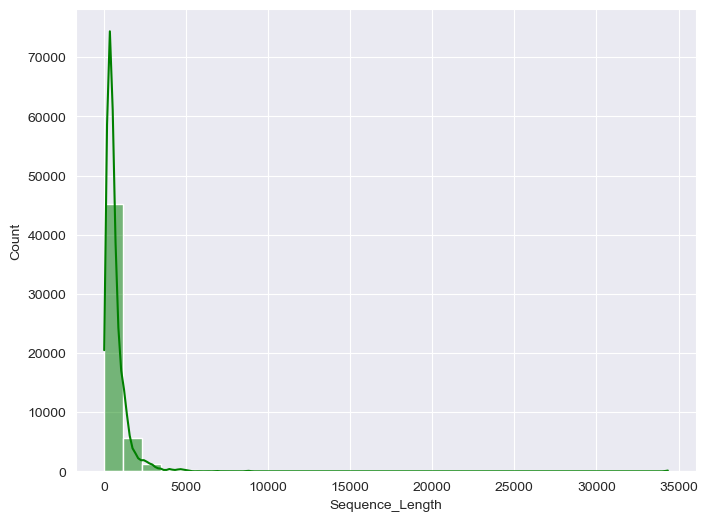

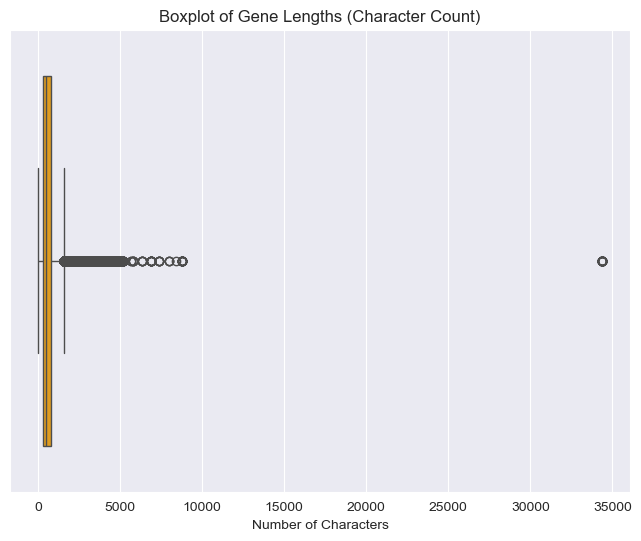

25th percentile: 283.0
50th percentile: 475.0
75th percentile: 792.0


In [94]:
# Adding the sequence length (number of characters in each gene sequence)
final_df['Sequence_Length'] = final_df['Gene'].apply(len)

# Distribution of sequence lengths (character count)
plt.figure(figsize=(8, 6))

# Plotting the histogram
sns.histplot(final_df['Sequence_Length'], kde=True, bins=30, color='green')

# Plotting the boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x=final_df['Sequence_Length'], color='orange')
plt.title("Boxplot of Gene Lengths (Character Count)")
plt.xlabel("Number of Characters")
plt.show()

# Calculate percentiles
percentiles = [25, 50, 75]  # 25th, 50th (median), and 75th percentiles
percentile_values = np.percentile(final_df['Sequence_Length'], percentiles)

# Displaying the results
for p, value in zip(percentiles, percentile_values):
    print(f"{p}th percentile: {value}")

Gene sequences vary widely in length, with most sequences concentrated in the 283-792 range, based on the 25th to 75th percentiles. This variation may affect the encoding process for machine learning.

#### Distribution of Target Variable (Y)
Understanding the distribution of the target variable is essential for model development, as skewed data may affect the learning process.

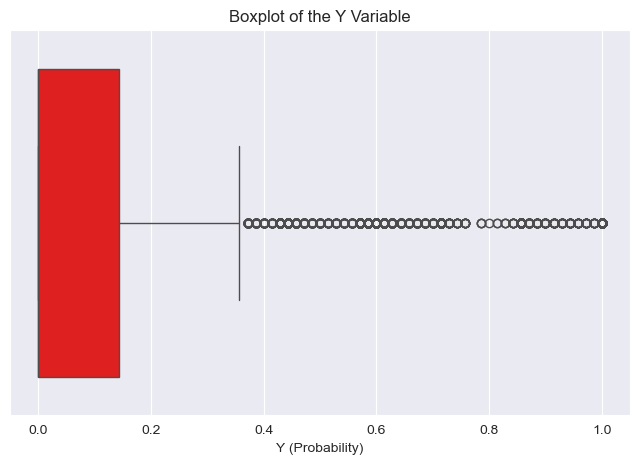

In [95]:
# Identification of outliers in the Y variable
# Plotting the boxplot of Y to visualize potential outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=final_df['Y'], color='red')
plt.title('Boxplot of the Y Variable')
plt.xlabel('Y (Probability)')
plt.show()

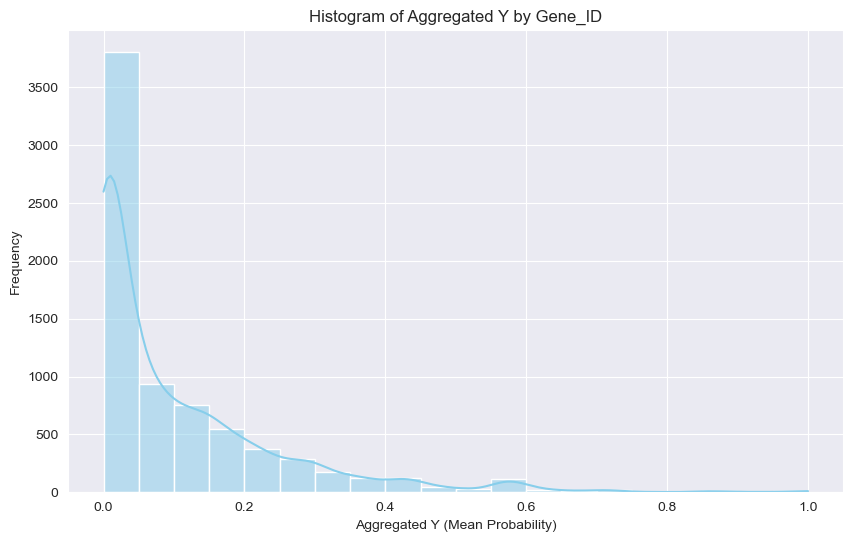

In [96]:
# Histogram of the association by Gene_ID and Y
# Aggregate the Y values by Gene_ID
gene_y_aggregated = final_df.groupby('Gene_ID')['Y'].mean()

# Plot a histogram to show the distribution of aggregated Y values
plt.figure(figsize=(10, 6))
sns.histplot(gene_y_aggregated, kde=True, bins=20, color="skyblue")
plt.title('Histogram of Aggregated Y by Gene_ID')
plt.xlabel('Aggregated Y (Mean Probability)')
plt.ylabel('Frequency')
plt.show()

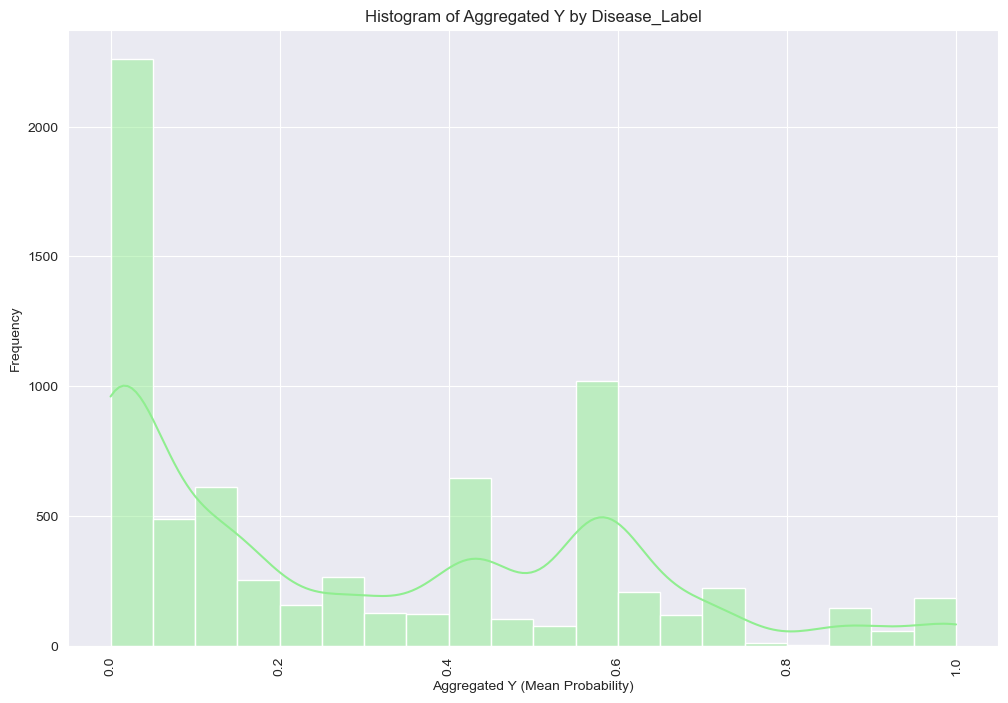

In [97]:
# Histogram of the association by Disease_Label and Y
# Aggregate the Y values by Disease_Label
disease_y_aggregated = final_df.groupby('Disease_Label')['Y'].mean()

# Plot a histogram to show the distribution of aggregated Y values
plt.figure(figsize=(12, 8))
sns.histplot(disease_y_aggregated, kde=True, bins=20, color="lightgreen")
plt.title('Histogram of Aggregated Y by Disease_Label')
plt.xlabel('Aggregated Y (Mean Probability)')
plt.ylabel('Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

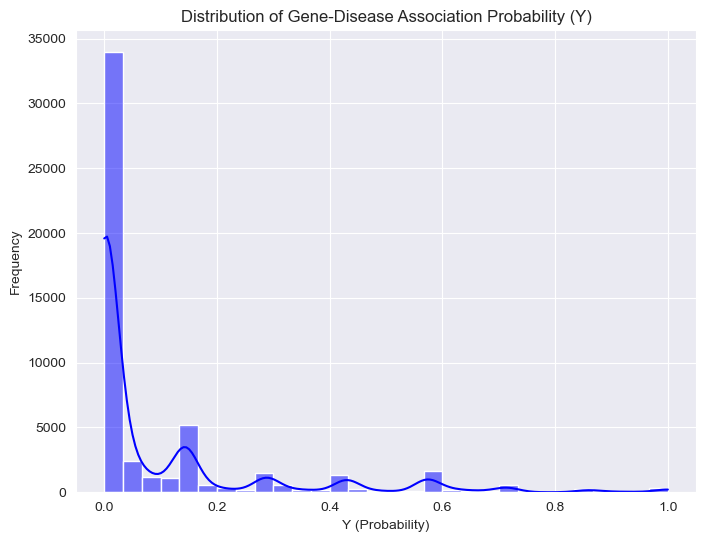

In [98]:
# Distribution plot for Y
plt.figure(figsize=(8, 6))
sns.histplot(final_df['Y'], kde=True, bins=30, color='blue')
plt.title("Distribution of Gene-Disease Association Probability (Y)")
plt.xlabel("Y (Probability)")
plt.ylabel("Frequency")
plt.show()

The target variable Y is moderately skewed towards lower probabilities, indicating that most gene-disease associations have low probability scores.

#### Gene and Disease Frequency Analysis

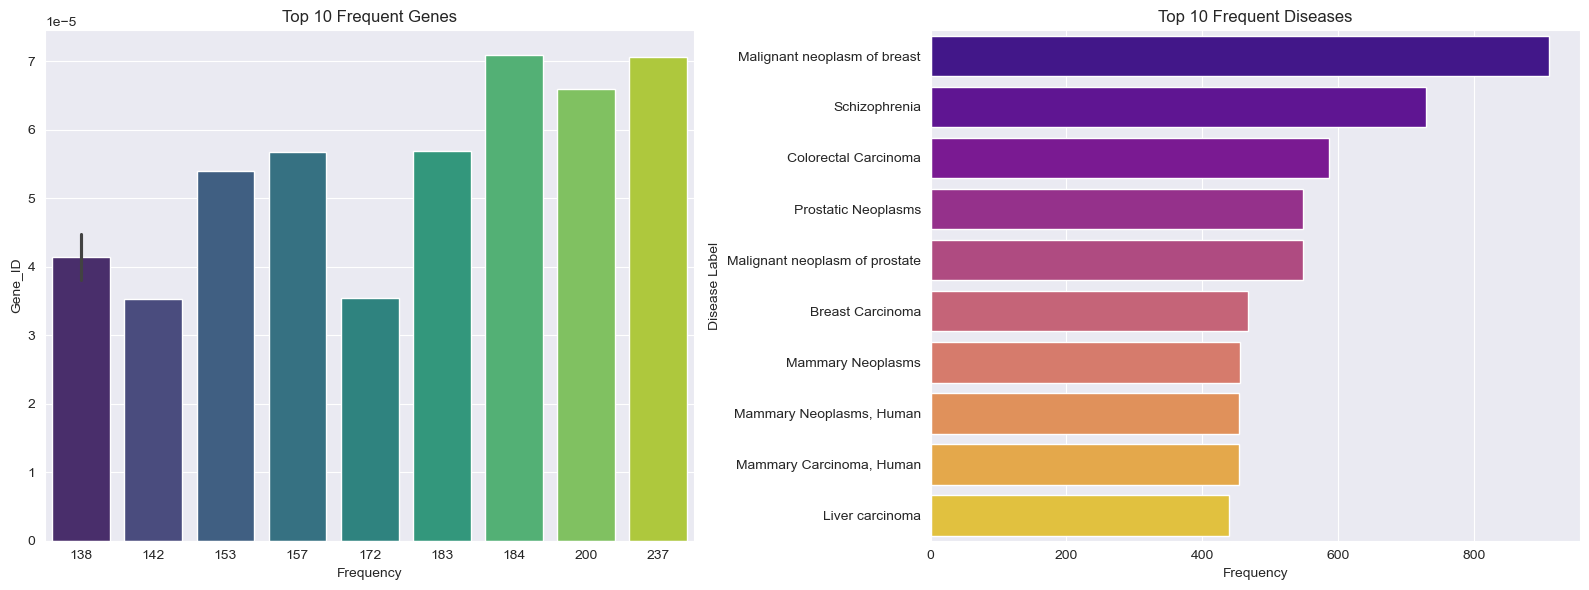

In [99]:
final_df['Disease_Label'] = final_df['Disease_Label'].str.split(':').str[0]

# Defining the 10 most frequent genes
top_genes = final_df['Gene_ID'].value_counts().head(10)

# Defining the 10 most frequent diseases
top_diseases = final_df['Disease_Label'].value_counts().head(10)


# Plotting top 10 genes and diseases
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top Genes
sns.barplot(x=top_genes.values, y=top_genes.index, ax=axes[0], palette="viridis")
axes[0].set_title("Top 10 Frequent Genes")
axes[0].set_xlabel("Frequency")
axes[0].set_ylabel("Gene_ID")

# Top Diseases
sns.barplot(x=top_diseases.values, y=top_diseases.index, ax=axes[1], palette="plasma")
axes[1].set_title("Top 10 Frequent Diseases")
axes[1].set_xlabel("Frequency")
axes[1].set_ylabel("Disease Label")

plt.tight_layout()
plt.show()

#### Gene-Disease Pairing Analysis
To explore the relationships between genes and diseases, we analyze and visualize their pairwise occurrences.

Top 5 Gene-Disease pairs:
         Gene_ID                   Disease_Label  Pair_Frequency
0      0.000000                    Hepatomegaly               1
34988  0.000072      Drug-Induced Liver Disease               1
34978  0.000072      Adenomatous Polyposis Coli               1
34979  0.000072        Adverse reaction to drug               1
34980  0.000072  Amyloid Neuropathies, Familial               1


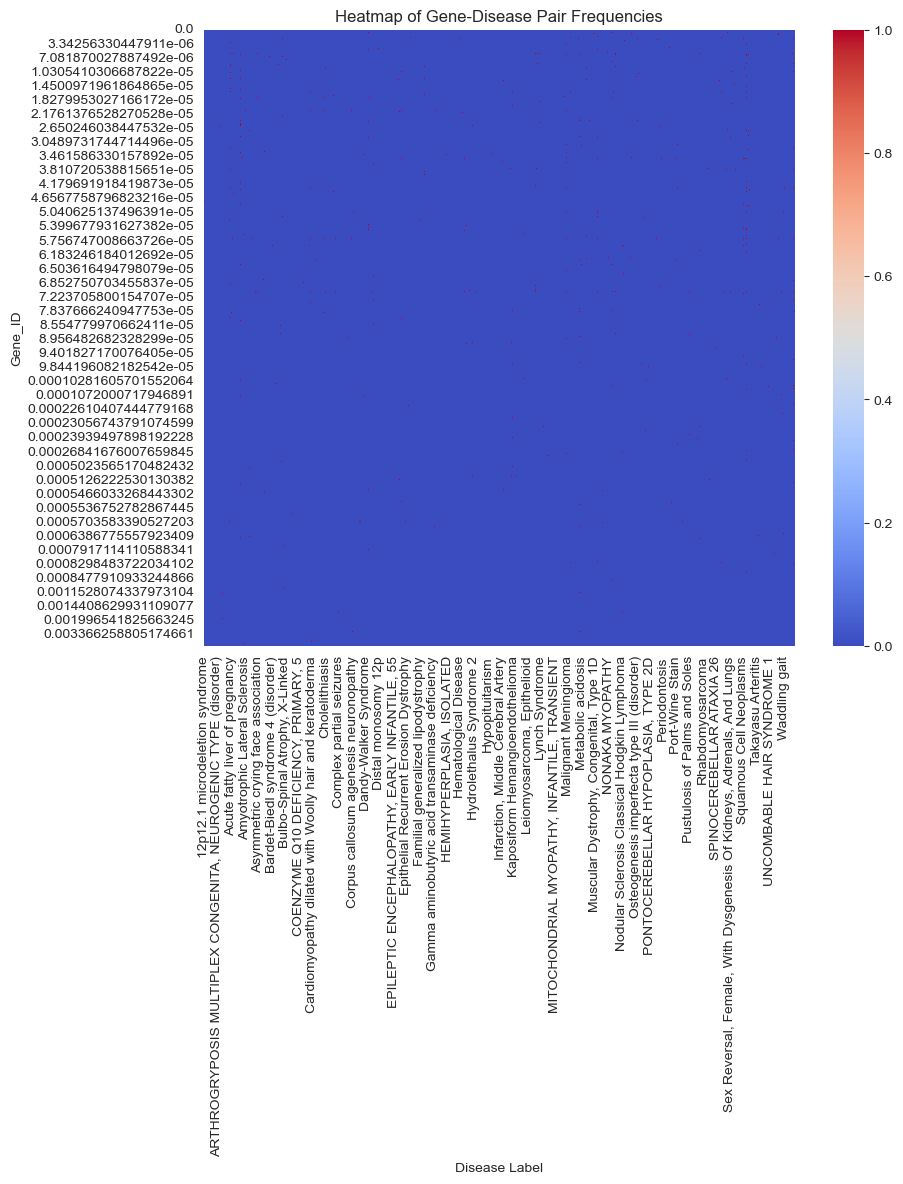

In [102]:
# Pairwise analysis
pair_counts = final_df.groupby(['Gene_ID', 'Disease_Label']).size().reset_index(name='Pair_Frequency')
pair_counts = pair_counts.sort_values(by='Pair_Frequency', ascending=False)

print("Top 5 Gene-Disease pairs:\n", pair_counts.head())

# Visualizing the pair frequency
plt.figure(figsize=(10, 8))
heatmap_data = pair_counts.pivot('Gene_ID', 'Disease_Label', 'Pair_Frequency').fillna(0)

sns.heatmap(heatmap_data, cmap='coolwarm', cbar=True, square=True)
plt.title("Heatmap of Gene-Disease Pair Frequencies")
plt.xlabel("Disease Label")
plt.ylabel("Gene_ID")
plt.show()

Some gene-disease pairs occur multiple times, indicating strong research focus or known associations.
The heatmap reveals clusters of high-frequency pairs, which can guide hypothesis generation.

#### Correlation Analysis
Checking correlations between numerical columns to understand dependencies.

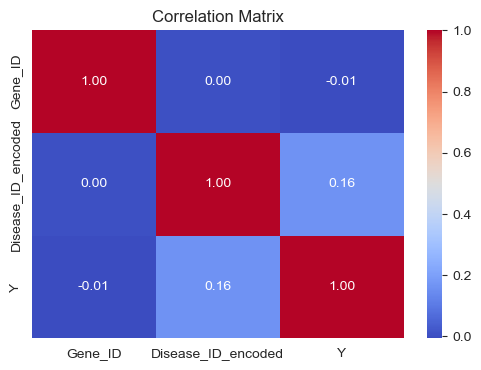

In [103]:
# Encoding the 'Disease_ID' column (if not already encoded)
label_encoder = LabelEncoder()
final_df['Disease_ID_encoded'] = label_encoder.fit_transform(final_df['Disease_ID'])

# Correlation matrix
corr_matrix = final_df[['Gene_ID', 'Disease_ID_encoded', 'Y']].corr()

# Plotting the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

Weak correlations exist between Y and other features, indicating that predictions will require complex patterns rather than simple linear relationships.

#### Conclusions from Exploratory Data Analysis

1. **Variable Distribution**:  
   - Most gene sequences range from 200 to 500 amino acids in length.  
   - The target variable 'Y' is slightly skewed towards lower probabilities, indicating that most gene-disease associations have a low likelihood.

2. **Gene and Disease Frequency**:  
   - Some genes and diseases appear much more frequently in the dataset. For example, certain genes appear in over 200 gene-disease pairs.  
   - The most common diseases include breast cancer and schizophrenia.

3. **Correlation and Outliers**:  
   - Correlations between variables are weak, suggesting that predictions will need to account for complex patterns.  
   - Outliers were identified in the variable 'Y' and should be considered when developing the model.

4. **Gene-Disease Pair Analysis**:  
   - Some gene-disease pairs occur multiple times, indicating strong research focus or well-known associations.  
   - Heatmap analysis shows high-frequency clusters, which could help guide hypothesis generation.

## 2. Unsupervised Learning

### Dimensionality Reduction

Working with high-dimensional data can present a number of challenges, such as increased computational complexity, greater risk of overfitting and difficulty interpreting the results.
As such, dimensionality reduction is a fundamental technique in machine learning, especially in problems with high dimensionality, where the number of variables or features is very large. This approach seeks to simplify the data set, keeping as much relevant information as possible, while eliminating redundancies and noise.

#### Principal Components Analysis (PCA)
PCA is a dimensionality reduction technique that transforms a set of possibly correlated variables into a new set of uncorrelated variables called principal components. It does this by identifying directions in the data space that capture the greatest possible variance, ordering these directions by importance. In this way, PCA makes it possible to represent the data in a lower-dimensional space, preserving as much information as possible.

In [109]:
X_train, X_test = train_test_split(final_df, test_size=0.2, random_state=42)

scaler_disease = StandardScaler()
scaler_vector = StandardScaler()

# Normalizing Disease_Embedding and vector
disease_embeddings_train = np.vstack(X_train['Disease_Embedding'])
vector_embeddings_train = np.vstack(X_train['vector'])

disease_embeddings_normalized = scaler_disease.fit_transform(disease_embeddings_train)
vector_embeddings_normalized = scaler_vector.fit_transform(vector_embeddings_train)

In [110]:
print(disease_embeddings_normalized.shape)  
print(vector_embeddings_normalized.shape)  

(41980, 768)
(41980, 100)


In [111]:
# Combine normalized embeddings
combined_features = np.hstack([disease_embeddings_normalized, vector_embeddings_normalized])

print(combined_features.shape)  # Example: (n_samples, total_dimension)

(41980, 868)


In [112]:
# Apply PCA to retain 95% of the variance
pca = PCA(n_components=0.95)
combined_features_pca = pca.fit_transform(combined_features)

print(combined_features_pca.shape)  

(41980, 258)


In [42]:
#If we want to test other n_comp values
#explained_variance = pca.explained_variance_ratio_.cumsum()
#print(f"Variância explicada com n_comp dimensões: {explained_variance[n_comp] * 100:.2f}%")

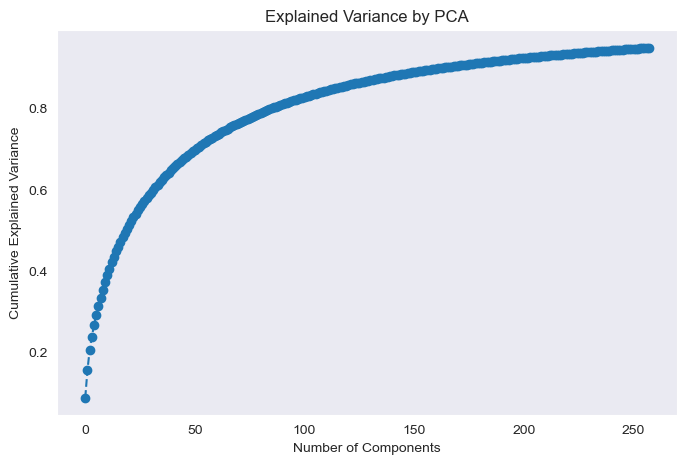

Variance explained by the first component: 0.09
Variance explained by the second component: 0.07
Number of components selected by PCA to retain 95% variance: 258


In [116]:
# Cumulative Explained Variance
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by PCA')
plt.grid()
plt.show()

print(f'Variance explained by the first component: {pca.explained_variance_ratio_[0]:.2f}')
print(f'Variance explained by the second component: {pca.explained_variance_ratio_[1]:.2f}')
print(f"Number of components selected by PCA to retain 95% variance: {pca.n_components_}")

### **t-SNE (t-Distributed Stochastic Neighbor Embedding)**  

t-SNE is a dimensionality reduction algorithm for visualizing high-dimensional data in 2D or 3D. It preserves local relationships by converting pairwise distances into probabilities and optimizing a low-dimensional representation to match these probabilities.  

The process involves:  
1. **Initialization:** Compute pairwise similarities in high-dimensional space using a Gaussian distribution.  
2. **Optimization:** Minimize divergence between high- and low-dimensional distributions, emphasizing local patterns.  
3. **Projection:** Represent the data in 2D or 3D, revealing clusters and relationships.  

In [121]:
disease_embeddings_train = np.array(X_train['Disease_Embedding'].tolist())
gene_embeddings_train = np.array(X_train['vector'].tolist())

combined_embeddings = np.concatenate((disease_embeddings_train, gene_embeddings_train), axis=1)

tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(combined_embeddings)

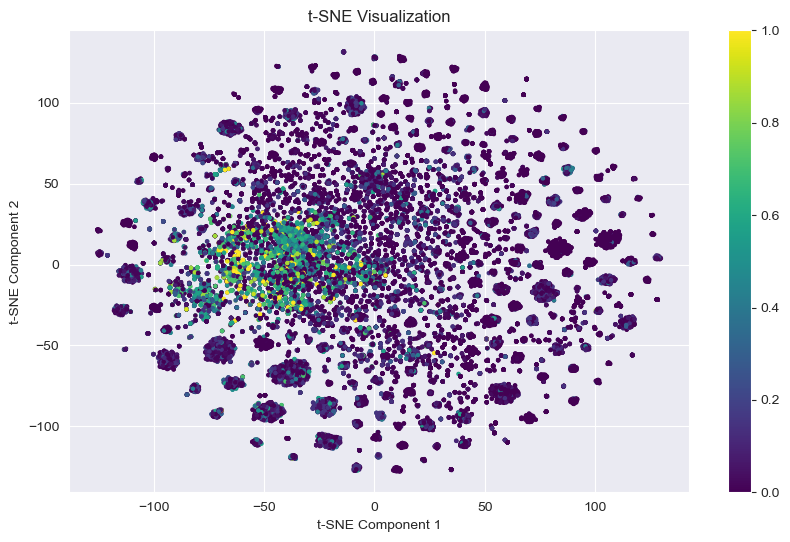

In [129]:
plt.figure(figsize=(10, 6))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=X_train['Y'], cmap='viridis', s=5)
plt.colorbar()
plt.title('t-SNE Visualization')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

### Clustering

Clustering is an unsupervised learning technique that identifies patterns and structure in data, grouping them into homogeneous clusters. It uses distance or similarity measures to group together nearby data points, seeking to maximize intra-cluster cohesion and inter-cluster separation. These clusters can reveal insights into the underlying structure of the data.
In this project, two clustering algorithms were addressed: **hierarchical clustering**, which builds a tree of clusters, where each node represents a cluster; **K-means**, which is a clustering algorithm that divides a data set into K clusters by minimizing the sum of the squares of the distances between the points and the centroids.

The module used for this analysis was **sklearn.cluster**


#### Hierarchical Clustering

To perform hierarchical clustering, we will follow these steps:

1. **Preprocessing**: Combine and normalize the "Disease_Embedding" and "vector" columns, which contain the numerical embeddings of disease and gene data, to create a feature matrix.  
2. **Distance Matrix Calculation**: Compute the distance matrix between the data points.  
3. **Applying Hierarchical Clustering Algorithm**: Use a hierarchical clustering method, such as SciPy's `linkage`.  
4. **Dendrogram Visualization**: Visualize the clustering results using a dendrogram.  

In [ ]:
# Check if the embeddings are already NumPy arrays
if not isinstance(X_train['Disease_Embedding'].iloc[0], np.ndarray):
    X_train['Disease_Embedding'] = X_train['Disease_Embedding'].apply(lambda x: np.array(x.strip('[]').split(), dtype=float))

if not isinstance(X_train['vector'].iloc[0], np.ndarray):
    X_train['vector'] = X_train['vector'].apply(lambda x: np.array(x.strip('[]').split(), dtype=float))

# Combine the embeddings into a single feature matrix
features = np.hstack((X_train['Disease_Embedding'].to_list(), X_train['vector'].to_list()))

# Normalize the data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Compute the distance matrix
distance_matrix = pdist(features_scaled)

In [ ]:
# Apply the hierarchical clustering algorithm
Z = linkage(distance_matrix, method='ward')

# Visualize the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Point Index')
plt.ylabel('Distance')
plt.show()

In [ ]:
# Normalize and calculate the distance matrix
features = np.hstack((X_train['Disease_Embedding'].to_list(), X_train['vector'].to_list()))
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
distance_matrix = pdist(features_scaled)

# Apply hierarchical clustering
Z = linkage(distance_matrix, method='ward')

# Define the number of clusters and extract labels
num_clusters = 4
clusters = fcluster(Z, num_clusters, criterion='maxclust')

# Visualize the dendrogram with improvements
plt.figure(figsize=(15, 10))
dendrogram(
    Z,
    truncate_mode='lastp',  # Display only the last 'p' clusters
    p=num_clusters,         # Number of clusters to display
    leaf_rotation=90.,      # Rotation of the labels on the X axis
    leaf_font_size=10.,     # Font size for the labels
    show_contracted=True,   # Show contracted nodes
    color_threshold=1500    # Set a threshold to color clusters
)
plt.title('Hierarchical Clustering Dendrogram (Enhanced)')
plt.xlabel('Cluster or Data Point Index')
plt.ylabel('Distance')

# Add a horizontal line to indicate the cluster cut-off
plt.axhline(y=1500, color='r', linestyle='--', label='Threshold (Cut Level)')
plt.legend()

plt.show()

#### Clustering K-Means

K-means is an unsupervised clustering algorithm widely used to group data into distinct clusters. The goal of K-means is to divide a dataset into K clusters in such a way that the data within the same cluster are as homogeneous as possible, while the data in different clusters are as distinct as possible.

The operation of K-means is based on the idea that the data can be represented by centroids, or central points, and that the distance between the data and its corresponding centroid should be minimized. The algorithm achieves this through an iterative process that follows three main steps:

- Initialization: The algorithm starts with the random selection of K central points (centroids) that will serve as the initial centers of the clusters. In this case, the number of clusters K is determined using the **elbow - method**, which helps identify the optimal number of clusters by analyzing the point where the reduction in inertia (sum of squared distances) begins to slow down.

- Assignment: Each data point is assigned to the nearest center, meaning each point is assigned to the cluster whose centroid is closest, based on a distance metric such as Euclidean distance.

- Update: After assigning the points to the clusters, the algorithm recalculates the position of the centroids as the average of the points belonging to each cluster.

In [ ]:
# Choose the number of clusters using the Elbow Method
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(combined_features_pca)
    sse.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, sse, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('SSE')
plt.title('Elbow Method for Determining the Number of Clusters')
plt.show()


By observing the graph, it was determined that the point on the graph resembling an "elbow" occurs at K=3. From the point K=3 onwards, adding more clusters does not result in a significant reduction of the WSS (Within-Cluster Sum of Squares).



In [ ]:
optimal_k = 3

# Apply K-means with the chosen number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(combined_features_pca)

# Add cluster labels to the original dataframe
full_data['Cluster'] = clusters

In [ ]:
y_values = X_train['Y']  # Replace 'Y' with the correct column name

# 2D Plot colored by the Y variable
plt.figure(figsize=(10, 8))
scatter = plt.scatter(
    combined_features_pca[:, 0], combined_features_pca[:, 1],
    c=y_values, cmap='viridis', alpha=0.6
)

# Add a color bar to show the scale of the Y variable
cbar = plt.colorbar(scatter)
cbar.set_label('Y Value', fontsize=14)

# Add title and labels
plt.title('PCA 2D Visualization Colored by Y', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)
plt.show()

## 3. Machine Learning (ML)
Machine Learning is a subset of artificial intelligence (AI) that focuses on building systems that learn from data and improve over time without being explicitly programmed. In ML, algorithms identify patterns in data and use those patterns to make predictions or decisions.

In [ ]:
# Preparar os dados
# Supondo que 'final_df' é o dataframe com os dados processados
X = final_df[['Disease_Embedding', 'vector']].apply(lambda x: np.concatenate(x), axis=1).tolist()
y = final_df['Y']

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Random Forest Regressor with Cross-Validation and Hyperparameter Optimization

In [ ]:
# 1. Initialize the model
model = RandomForestRegressor(random_state=42)

# 2. Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# 3. Set up cross-validation with GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=1, scoring='neg_mean_squared_error')

# 4. Train the model with cross-validation
grid_search.fit(X_train, y_train)

# 5. Evaluate the model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

### Linear Regression

In [ ]:
# 1. Initialize the linear regression model
model = LinearRegression()

# 2. Train the model
model.fit(X_train, y_train)

# 3. Make predictions and evaluate the model
# Make predictions on the test set
y_pred = model.predict(X_test)

# 4. Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

### Decision Tree

In [ ]:
# 1. Initialize the classifier
clf = DecisionTreeClassifier(random_state=42)

# 2. Train the model
clf.fit(X_train, y_train)

# 3. Make predictions and evaluate the model
# Make predictions on the test set
y_pred = clf.predict(X_test)

# 4. Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

### Random Forest

In [ ]:
# 1. Initialize the Random Forest model
model = RandomForestRegressor(random_state=42)

# 2. Train the model
model.fit(X_train, y_train)

# 3. Make predictions and evaluate the model
# Make predictions on the test set
y_pred = model.predict(X_test)

# 4. Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

### Ridge Regression

In [ ]:
# 1. Initialize the Ridge regression model
ridge_model = Ridge(alpha=1.0)

# 2. Train the model
ridge_model.fit(X_train, y_train)

# 3. Make predictions on the test set
ridge_y_pred = ridge_model.predict(X_test)

# 4. Calculate the mean squared error
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
print(f'Mean Squared Error (Ridge): {ridge_mse}')

### Lasso Regression

In [ ]:
# 1. Initialize the Lasso regression model
lasso_model = Lasso(alpha=1.0)

# 2. Train the model
lasso_model.fit(X_train, y_train)

# 3. Make predictions on the test set
lasso_y_pred = lasso_model.predict(X_test)

# 4. Calculate the mean squared error
lasso_mse = mean_squared_error(y_test, lasso_y_pred)
print(f'Mean Squared Error (Lasso): {lasso_mse}')

### KNN

In [ ]:
# 1. Initialize the KNN model
model = KNeighborsRegressor(n_neighbors=5)

# 2. Train the model
model.fit(X_train, y_train)

# 3. Make predictions on the test set
y_pred = model.predict(X_test)

# 4. Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (KNN): {mse}')

### Model Evaluation

In [ ]:
# Dictionary to store the metrics
mse_scores = {
    'Linear Regression': linear_mse,
    'Ridge Regression': ridge_mse,
    'Lasso Regression': lasso_mse,
    'Random Forest': rf_mse,
    'KNN': knn_mse
}

# Sort the models by MSE
sorted_models = sorted(mse_scores.items(), key=lambda x: x[1])

# Display the comparison
print("Model Comparison:")
for model_name, mse in sorted_models:
    print(f"{model_name}: MSE = {mse}")

# Select the best model
best_model_name, best_model_mse = sorted_models[0]
print(f"\nBest Model: {best_model_name} with MSE = {best_model_mse}")

## 4. Deep Learning (ML)
Deep Learning is a subset of Machine Learning that involves neural networks with many layers (also known as deep neural networks). It is used for more complex tasks like image and speech recognition, natural language processing, and autonomous driving. Deep learning algorithms automatically learn hierarchical features from raw data, allowing them to handle unstructured data like images, text, and audio.

## Bibliografia

[1] Opap, K., & Mulder, N. (2017). Recent advances in predicting gene–disease associations. F1000Research, 6, 578. https://doi.org/10.12688/f1000research.10788.1
    
[2] Therapeutics Data Commons. (2024). TDC. https://tdcommons.ai/

[3] Piñero, J., Ramírez-Anguita, J. M., Saüch-Pitarch, J., Ronzano, F., Centeno, E., Sanz, F., & Furlong, L. I. (2019). The DisGeNET knowledge platform for disease genomics: 2019 update. Nucleic Acids Research, 48(D1). https://doi.org/10.1093/nar/gkz1021

[4] Lee, J., Yoon, W., Kim, S., Kim, D., Kim, S., So, C. H., & Kang, J. (2019). BioBERT: a pre-trained biomedical language representation model for biomedical text mining. Bioinformatics, 36(4). https://doi.org/10.1093/bioinformatics/btz682